normal_dataset.json
success read
option here B
option here D
option here D
option here A
option here D
option here B
option here A
option here D
option here A
option here B
option here B
option here A
option here A
option here C
option here A
option here D
option here C
option here D
option here A
option here B
option here C
option here D
option here B
option here B
option here D
option here D
option here A
option here B
option here A
option here C
option here D
option here A
option here D
option here B
option here D
option here C
option here D
option here C
option here B
option here D
option here C
option here A
option here B
option here A
option here A
option here C
option here D
option here A
option here A
option here C
option here C
option here B
option here A
option here B
option here B
option here C
option here A
option here A
option here D
option here D
option here A
option here A
option here C
option here A
option here B
option here A
option here C
option here D
option here B
o

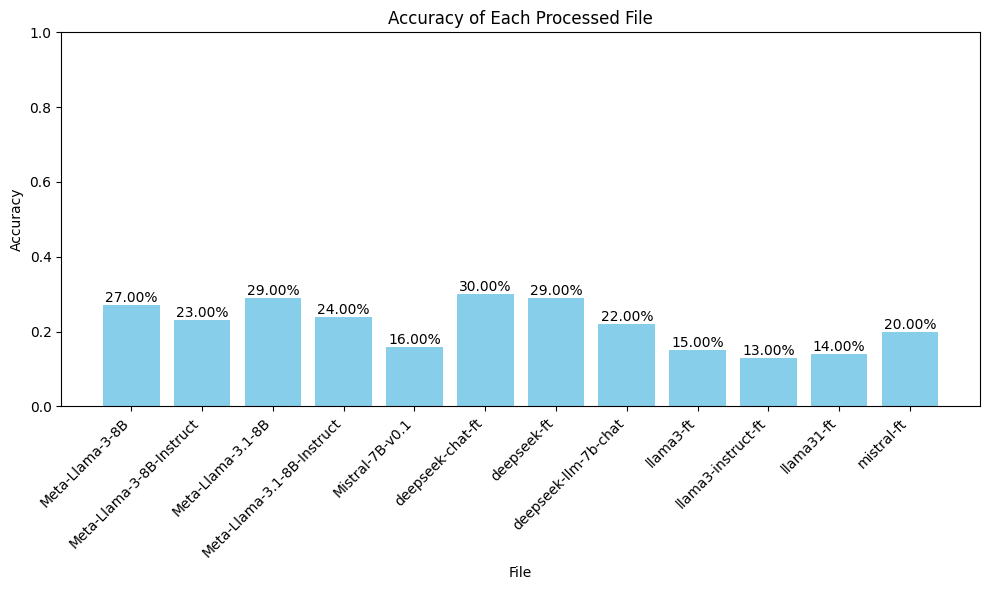

In [7]:
import json
import os
import matplotlib.pyplot as plt

def extract_uncertain_option(prompt_text):

        
    # # 获取choices部分的文本
    # prompt_text = data['prompt']
    
    # 按行分割
    lines = prompt_text.split('\n')
    
    # 找到Choices:的索引
    try:
        choices_index = lines.index("Choices:")
    except ValueError:
        return None
    
    # 检查Choices:后的选项
    for line in lines[choices_index+1:]:
        # 跳过空行
        if not line.strip():
            continue
        # 如果行包含"uncertain"
        if 'uncertain' in line.lower():
            # 确保行是一个选项(包含")")
            if ")" in line:
                option = line.split(")")[0].strip()
                print("option here" ,option)
                return option
    return None

    
def calculate_accuracy(json_file_path):
    """计算单个 JSON 文件的准确率"""
    total = 0
    correct = 0
# 文件路径
    # 判断文件是否存在
    if os.path.exists(json_file_path):
        try:
            with open(json_file_path, 'r', encoding='utf-8') as f:
                print("success read")
                total = 0  # 初始化计数器
                correct = 0
                for line in f:
                    try:
                        data = json.loads(line)  # 逐行解析 JSON
                        uncertain_option= extract_uncertain_option(data .get("prompt"))
                        # 判断 'prediction' 是否在预定义范围内
                        # if data['classification'] in {'A', 'B', 'C', 'D', 'E'}:
                        #         total += 1
                        # if data['classification'] == data['true_label']:
                        #         correct += 1
                        if data.get('prediction') in {'A', 'B', 'C', 'D', 'E'}:
                            total += 1
                        # if data.get('prediction') == data.get('true_label'):
                        #     correct += 1
                        if data.get('prediction') == uncertain_option:
                            correct += 1
                    except json.JSONDecodeError as e:
                        print(f"JSONDecodeError: {e} in line {line}")
                        continue  # 跳过解析错误的行
        except Exception as e:
            print(f"Error while reading the file: {e}")
    else:
        print("File does not exist.")

    accuracy = correct / total if total > 0 else 0
    return accuracy, total, correct

def process_directory(directory_path):
    """处理文件夹中的每个 processed_decoded_outputs.json 文件并计算准确率"""
    accuracies = []
    file_names = []

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            print(file)
            if file == "normal_dataset.json":
            # if file == "processed_decoded_outputs.json":
                file_path = os.path.join(root, file)
                accuracy, total, correct = calculate_accuracy(file_path)
                print(f"文件: {file_path}\n总样本: {total}, 正确样本: {correct}, 准确率: {accuracy:.2%}")
                
                # 将结果存储到列表中，用于绘图
                accuracies.append(accuracy)
                root = os.path.basename(root)
                file_names.append(root)  # 使用文件所在目录作为标签

    # 绘制准确率柱状图
    return plot_accuracy(file_names, accuracies)

def plot_accuracy(file_names, accuracies):
    """绘制准确率垂直柱状图并标出数值"""
    plt.figure(figsize=(10, 6))
    sorted_data = sorted(zip(file_names, accuracies), key=lambda x: x[0])
    file_names, accuracies = zip(*sorted_data)
    bars = plt.bar(file_names, accuracies, color='skyblue')

    # bars = plt.bar(file_names, accuracies, color='skyblue')
    plt.ylabel('Accuracy')
    plt.xlabel('File')
    plt.title('Accuracy of Each Processed File')
    plt.ylim(0, 1)  # 确保 y 轴的范围是 0 到 1

    # 在每个柱子上标注准确率数值
    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{accuracy:.2%}', ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签，避免重叠
    plt.tight_layout()
    # plt.savefig("./Pics/acc_wogpt")
    plt.show()
    return file_names, accuracies

# 示例调用
directory_path = "./Output/secondnormaloutput"  # 根据你的文件路径调整
file_names1, accuracies1 = process_directory(directory_path)



debug.json
decoded_outputs.json
processed_decoded_outputs.json
success read
option here B
option here D
option here D
option here A
option here D
option here B
option here A
option here D
option here A
option here B
option here B
option here A
option here A
option here C
option here A
option here D
option here C
option here D
option here A
option here B
option here C
option here D
option here B
option here B
option here D
option here D
option here A
option here B
option here A
option here C
option here D
option here A
option here D
option here B
option here D
option here C
option here D
option here C
option here B
option here D
option here C
option here A
option here B
option here A
option here A
option here C
option here D
option here A
option here A
option here C
option here C
option here B
option here A
option here B
option here B
option here C
option here A
option here A
option here D
option here D
option here A
option here A
option here C
option here A
option here B
option here A


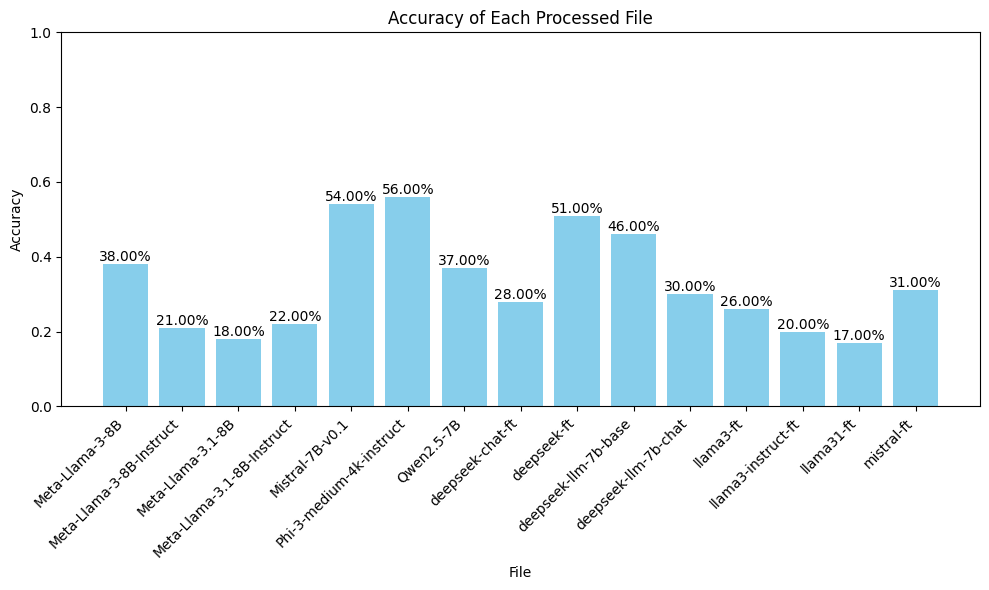

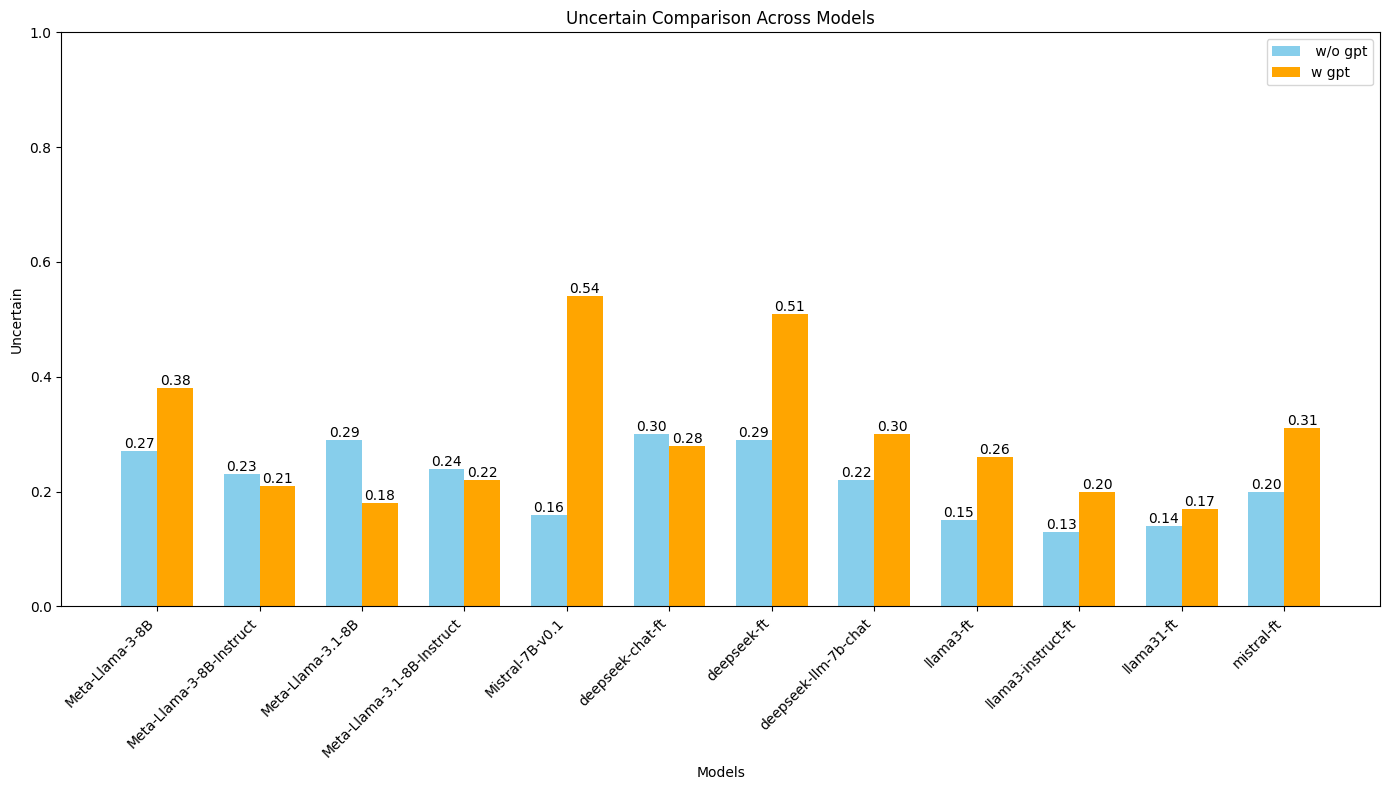

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_accuracy(json_file_path):
    """计算单个 JSON 文件的准确率"""
    total = 0
    correct = 0
# 文件路径
    # 判断文件是否存在
    if os.path.exists(json_file_path):
        try:
            with open(json_file_path, 'r', encoding='utf-8') as f:
                print("success read")
                total = 0  # 初始化计数器
                correct = 0
                for line in f:
                    try:
                        data = json.loads(line)  # 逐行解析 JSON
                        # 判断 'prediction' 是否在预定义范围内
                        uncertain_option= extract_uncertain_option(data['prompt'])

                        if data['classification'] in {'A', 'B', 'C', 'D', 'E'}:
                            total += 1
                            if data['classification'] == uncertain_option:
                                correct += 1
                        else:
                            total+=1
                            correct +=1

                   
                        # if data.get('prediction') in {'A', 'B', 'C', 'D', 'E'}:
                        #     total += 1
                        # if data.get('prediction') == data.get('true_label'):
                        #     correct += 1
                    except json.JSONDecodeError as e:
                        print(f"JSONDecodeError: {e} in line {line}")
                        continue  # 跳过解析错误的行
        except Exception as e:
            print(f"Error while reading the file: {e}")
    else:
        print("File does not exist.")

    accuracy = correct / total if total > 0 else 0
    return accuracy, total, correct

def process_directory(directory_path):
    """处理文件夹中的每个 processed_decoded_outputs.json 文件并计算准确率"""
    accuracies = []
    file_names = []

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            print(file)
            # if file == "normal_dataset.json":
            if file == "processed_decoded_outputs.json":
                file_path = os.path.join(root, file)
                accuracy, total, correct = calculate_accuracy(file_path)
                print(f"文件: {file_path}\n总样本: {total}, 正确样本: {correct}, 准确率: {accuracy:.2%}")
                
                # 将结果存储到列表中，用于绘图
                accuracies.append(accuracy)
                root = os.path.basename(root)
                file_names.append(root)  # 使用文件所在目录作为标签

    # 绘制准确率柱状图
    return plot_accuracy(file_names, accuracies)

def plot_accuracy(file_names, accuracies):
    """绘制准确率垂直柱状图并标出数值"""
    plt.figure(figsize=(10, 6))
    sorted_data = sorted(zip(file_names, accuracies), key=lambda x: x[0])
    file_names, accuracies = zip(*sorted_data)
    bars = plt.bar(file_names, accuracies, color='skyblue')

    # bars = plt.bar(file_names, accuracies, color='skyblue')
    plt.ylabel('Accuracy')
    plt.xlabel('File')
    plt.title('Accuracy of Each Processed File')
    plt.ylim(0, 1)  # 确保 y 轴的范围是 0 到 1

    # 在每个柱子上标注准确率数值
    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{accuracy:.2%}', ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签，避免重叠
    plt.tight_layout()
    # plt.savefig("./Pics/acc_wogpt")
    plt.show()
    return file_names, accuracies
directory_path = "./Output/wiki_dataset"  # 根据你的文件路径调整

file_names2, accuracies2 = process_directory(directory_path)
# 合并横坐标
all_file_names = sorted(set(file_names1).intersection(set(file_names2)))

# 对齐数据
acc1_aligned = [accuracies1[file_names1.index(f)] if f in file_names1 else 0 for f in all_file_names]
acc2_aligned = [accuracies2[file_names2.index(f)] if f in file_names2 else 0 for f in all_file_names]

# 绘图
x = np.arange(len(all_file_names))  # 横坐标索引
width = 0.35  # 柱宽

plt.figure(figsize=(14, 8))

# 绘制两组柱状图
bars1 = plt.bar(x - width/2, acc1_aligned, width, label=" w/o gpt", color='skyblue')
bars2 = plt.bar(x + width/2, acc2_aligned, width, label="w gpt", color='orange')
# 添加柱状图顶部的数值标注
for bar, acc in zip(bars1, acc1_aligned):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

for bar, acc in zip(bars2, acc2_aligned):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{acc:.2f}', ha='center', va='bottom', fontsize=10)
# 添加标签和标题
plt.ylabel("Uncertain")
plt.xlabel("Models")
plt.title("Uncertain Comparison Across Models")
plt.xticks(x, all_file_names, rotation=45, ha="right")
plt.ylim(0, 1)
plt.legend()

# 保存和展示
plt.tight_layout()
plt.savefig("Uncertain_comparison.png")
plt.show()

['A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'B', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A']
['B', 'B', 'A', 'C', 'A', 'D', 'A', 'C', 'C', 'D', 'C', 'B', 'B', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'D', 'C', 'A', 'A', 'D', 'B', 'B', 'D', 'D', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'A', 'B', 'A', 'D', 'C', 'C', 'D', 'A', 'B', 'D', 'B', 'B', 'B', 'A', 'B', 'C', 'A', 'C', 'D', 'C', 'B', 'C', 'B', 'D', 'C', 'B', 'C', 'A', 'C', 'C', 'D', 'C', 'A', 'B', 'A', 'B', 'D', 'A', 'C', 'D', 'B', 'D', 'B', 'C', 'A', 'D', 'A', 'D', 'B', 'C', 'A', 'C', 'A', 'C', 'D', 'C', 'A', 'B', 'A', 'A', 'D', 'A', 'D'

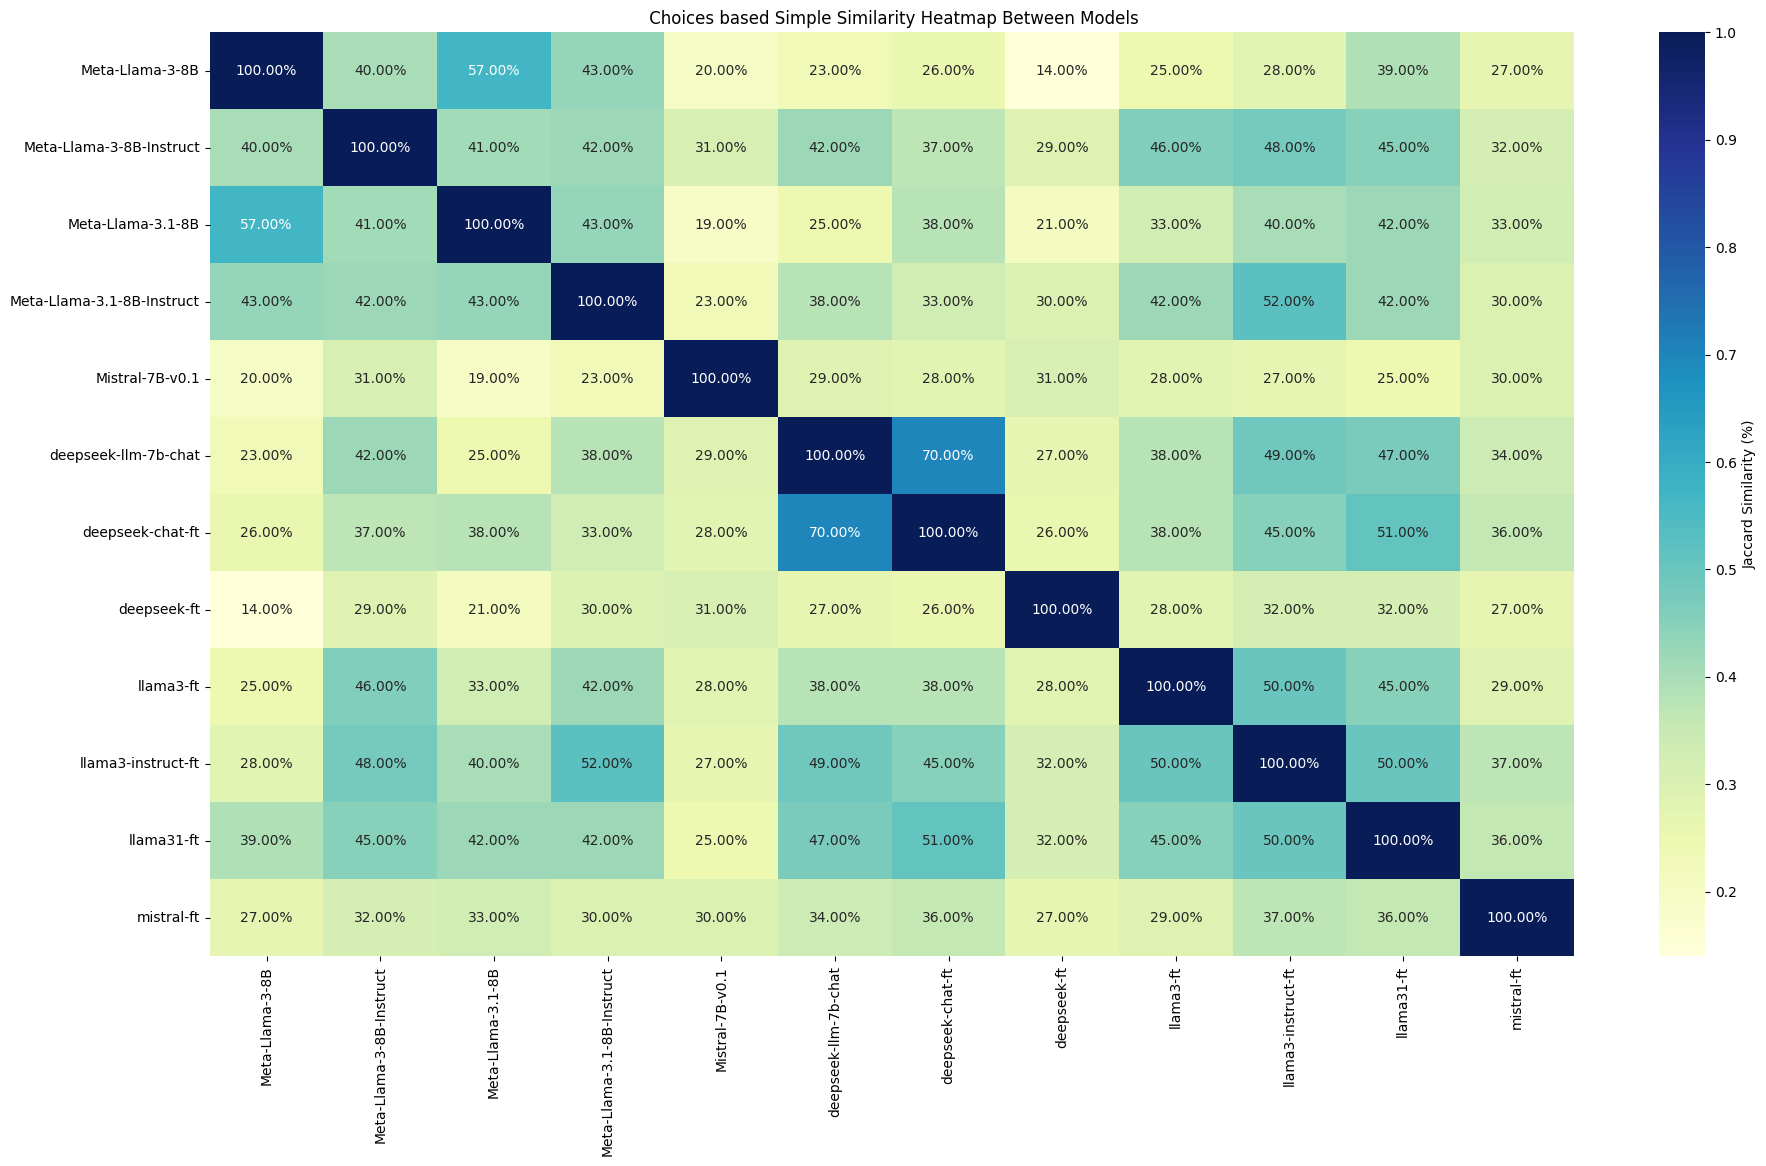

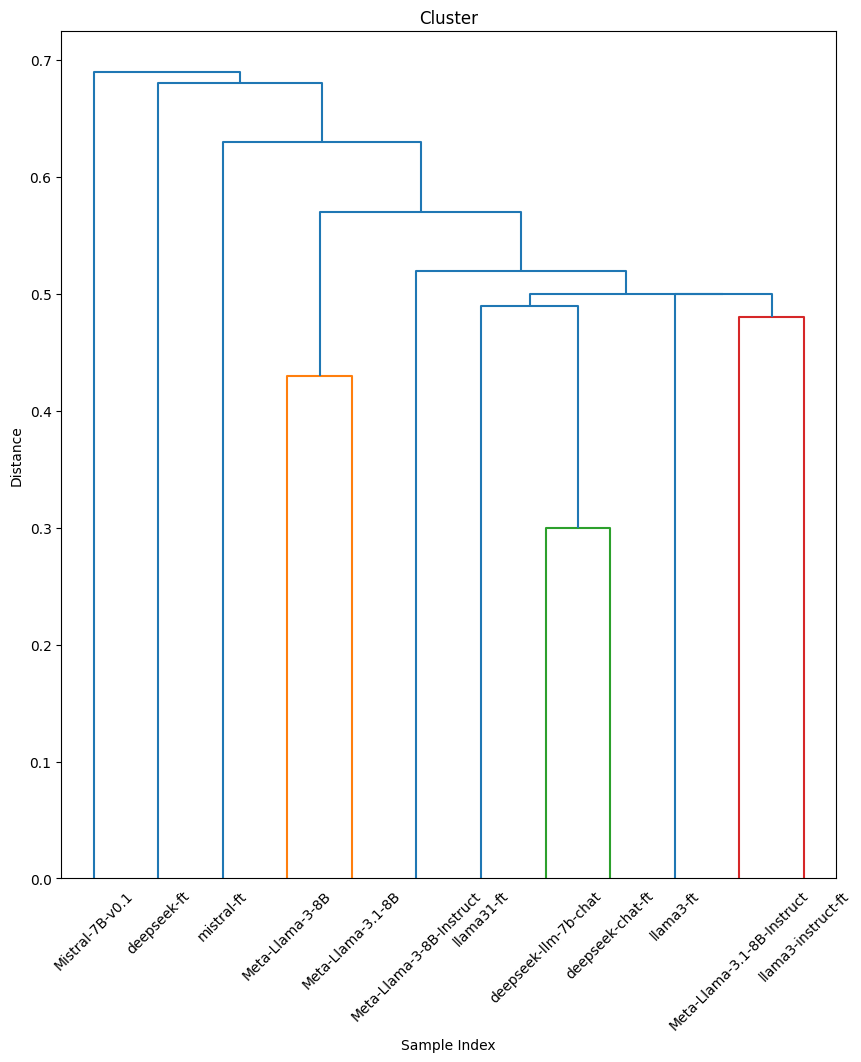

In [51]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_correct_indices(json_file_path):
    """计算单个JSON文件的正确回答编号"""
    correct_indices = []
    with open(json_file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            try:
                data = json.loads(line)
                # if data['prob']["A"] == 0.25:
                #     continue
                # if data['prob'][data['prediction']] <= 0.3:
                #     continue
                # if data['classification'] == data['true_label']:
                # if data['prediction'] == data['true_label']:
                #     correct_indices.append(i)  # 保存正确回答的编号
                # correct_indices.append(str(i)+data['prediction'])  # 保存正确回答的编号
                correct_indices.append(data['prediction'])  # 保存正确回答的编号
                # correct_indices.append(data['classification'])  # 保存正确回答的编号


            except json.JSONDecodeError as e:
                print(f"JSONDecodeError: {e} in line {line}")
                continue
    print(correct_indices)
    return correct_indices

def jaccard_similarity(list1, list2):
    """计算两个列表之间的 Jaccard 相似度"""
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    # print(intersection)
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0
def position_sensitive_similarity(list1, list2):
    """计算两个列表之间的位置信息敏感相似度"""
    # 确保两个列表的长度相同。如果不相同，取最小长度来计算
    min_length = min(len(list1), len(list2))
    
    # 统计在相同位置上元素匹配的个数
    matches = sum(1 for i in range(min_length) if list1[i] == list2[i])
    
    # 计算位置敏感的相似度
    return matches / min_length if min_length != 0 else 0
def process_directory(directory_path):
    """处理文件夹中的每个 normal_dataset.json 文件并计算 Jaccard 相似度"""
    datasets = {}
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file == "normal_dataset.json":
            # if file == "processed_decoded_outputs.json":
                file_path = os.path.join(root, file)
                dataset_name = os.path.basename(root)
                correct_indices = calculate_correct_indices(file_path)
                datasets[dataset_name] = correct_indices

    # 对数据集名称进行字母顺序排序
    # dataset_names = sorted(datasets.keys())
    # 自定义排序函数：将带有 -ft 后缀的名称放到最后
    dataset_names = sorted(datasets.keys(), key=lambda x: (x.endswith('-ft'), x))
    similarity_matrix = pd.DataFrame(index=dataset_names, columns=dataset_names)

    # 填充 Jaccard 相似度矩阵
    for i, name1 in enumerate(dataset_names):
        for j, name2 in enumerate(dataset_names):
            if i == j:
                similarity_matrix.loc[name1, name2] = 1.0
            else:
                # similarity = position_sensitive_similarity(datasets[name1], datasets[name2])
                # similarity = jaccard_similarity(datasets[name1], datasets[name2])
                # similarity_matrix.loc[name1, name2] = similarity
                seq1, seq2 = datasets[name1], datasets[name2]
                # 计算位置完全一致的比例（相似度）
                matches = sum([1 for a, b in zip(seq1, seq2) if a == b])
                similarity = matches / len(seq1)
                
                # 填入对称矩阵
                similarity_matrix.loc[name1,name2] = similarity
                # similarity_matrix[name2][name1] = similarity

    return similarity_matrix.astype(float)

# 处理目录并计算相似度矩阵
# directory_path = "./Output/wiki_dataset"  # 根据你的文件路径调整
directory_path = "./Output/secondnormaloutput"  # 替换为实际路径
similarity_matrix = process_directory(directory_path)

# 绘制热力图
plt.figure(figsize=(22, 12))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", fmt=".2%", cbar_kws={'label': 'Jaccard Similarity (%)'})
plt.title(' Choices based Simple Similarity Heatmap Between Models')
# plt.title(' Choices based GPT PROCESSED Simple Similarity Heatmap Between Models')
# plt.savefig("./Pics/choicesbased_simple  GPT PROCESSED Similarity Heatmap Between Models.png")

plt.savefig("./Pics/choicesbased_simple Similarity Heatmap Between Models.png")

# plt.show()
from sklearn.cluster import AgglomerativeClustering

# 示例距离矩阵（对称矩阵）
# 示例相似度矩阵




# # 使用 AgglomerativeClustering，输入距离矩阵
# clustering = AgglomerativeClustering(
#     n_clusters=2,  # 最终分成的簇数
#     metric='precomputed',  # 使用预计算的距离矩阵
#     linkage='single'  # 聚类方法：单链、全链、平均
# )

# # 预测聚类
# labels = clustering.fit_predict(distance_matrix)

# # 打印聚类结果
# print("Cluster Labels:", labels)
# 将对称矩阵转换为压缩形式（只保留上三角）
# print(similarity_matrix)

from scipy.cluster.hierarchy import linkage, dendrogram


from scipy.spatial.distance import squareform
# 使用单位矩阵表示 E
# E = np.eye(similarity_matrix.shape[0])  # 创建单位矩阵

# 计算距离矩阵
distance_matrix = (1 - similarity_matrix)
# print(distance_matrix)
compressed_dist_matrix = squareform(distance_matrix)

# 计算层次聚类（linkage）
Z = linkage(compressed_dist_matrix, method='single')  # 单链法，可改为 'complete', 'average', 'ward'

# 绘制树状图
plt.figure(figsize=(10, 11))
dendrogram(
    Z,
    labels=similarity_matrix.index.tolist(),  # 使用 similarity_matrix 的索引作为标签
    leaf_rotation=45,  # 标签旋转角度
    leaf_font_size=10  # 标签字体大小
)
plt.title("Cluster")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
# plt.xticks(rotation=135)
plt.savefig("./Pics/choicesbased_simple_CLUSTER.png")

# plt.savefig("./Pics/choicesbased_simple GPT PROCESSED_CLUSTER.png")
plt.show()

# # 调用函数处理文件夹并获取结果
# directory_path = "./normaloutput"  # 根据你的文件路径调整
# acc_results = process_directory(directory_path)

# # 将文件名和准确率分离出来用于绘图
# file_names = [result[0] for result in acc_results]
# accuracies = [result[1] for result in acc_results]

# # 绘制垂直条形图
# plt.figure(figsize=(10, 6))
# plt.bar(file_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

# # 添加标题和标签
# plt.ylabel('Accuracy (%)')
# plt.xlabel('Dataset')
# plt.title('Accuracy Comparison of Different Models')

# # 在每个条形上显示准确率的数值
# for index, value in enumerate(accuracies):
#     plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontweight='bold')

# # 显示图表
# plt.ylim(0, 100)  # 设置y轴的范围，最大到100%
# plt.tight_layout()
# plt.show()


模型: Mistral-7B-Instruct-v0.1
Category: semantic, 准确率: 98.91%
Category: temporal, 准确率: 97.78%
Category: misinformation, 准确率: 96.59%

模型: Meta-Llama-3.1-8B-Instruct
Category: semantic, 准确率: 95.45%
Category: temporal, 准确率: 87.32%
Category: misinformation, 准确率: 81.54%

模型: gemma-2-2b-it
Category: semantic, 准确率: 95.18%
Category: temporal, 准确率: 94.81%
Category: misinformation, 准确率: 91.67%

模型: Qwen2.5-7B
Category: semantic, 准确率: 91.94%
Category: temporal, 准确率: 95.00%
Category: misinformation, 准确率: 92.31%



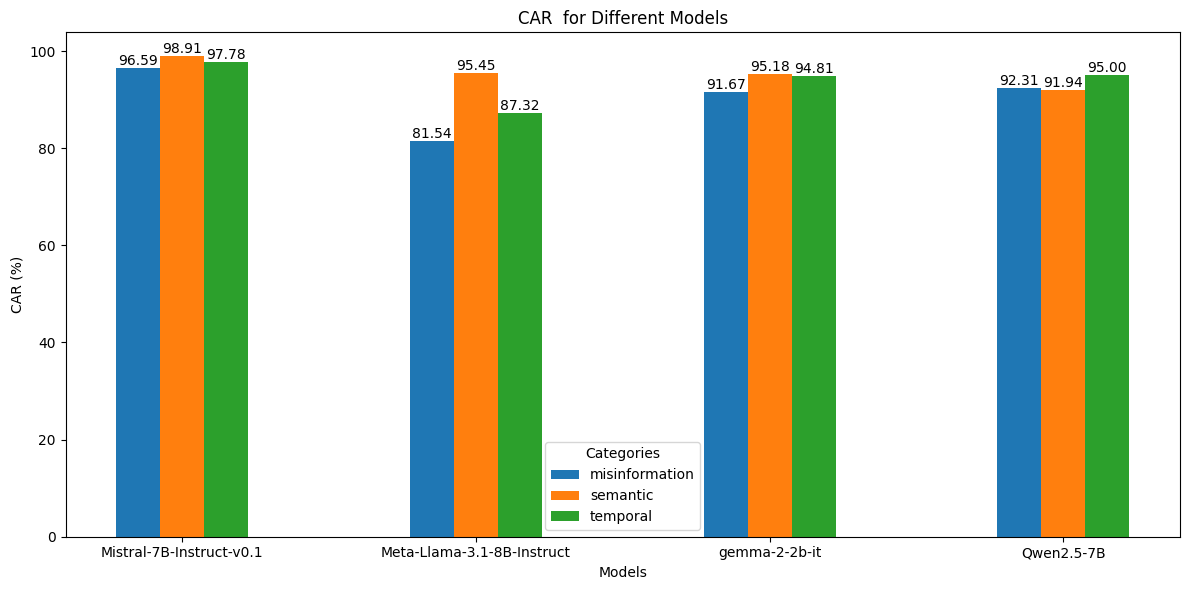

<Figure size 640x480 with 0 Axes>

In [28]:
import json
import os
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_accuracy_by_category(json_file_path):
    """计算每个 category 的准确率"""
    category_totals = defaultdict(int)
    category_corrects = defaultdict(int)

    with open(json_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)  # 逐行解析JSON
                category = data.get('category', 'Unknown')  # 获取 category 属性
                if data['prob']["A"] == 0.25:
                    continue
                category_totals[category] += 1
                if data['prediction'] == data['replaced_label']:
                    category_corrects[category] += 1
            except json.JSONDecodeError as e:
                print(f"JSONDecodeError: {e} in line {line}")
                continue  # 跳过解析错误的行

    # 计算每个 category 的准确率
    category_accuracies = {cat: (category_corrects[cat] / category_totals[cat]) * 100 if category_totals[cat] > 0 else 0
                           for cat in category_totals}
    
    return category_accuracies

def process_directory(directory_path):
    """处理文件夹中的每个 conflict.json 文件并计算每个 category 的准确率"""
    all_results = {}
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file == "conflict.json":
                file_path = os.path.join(root, file)
                category_accuracies = calculate_accuracy_by_category(file_path)
                dataset_name = os.path.basename(root)  # 使用文件夹名作为数据集名称
                all_results[dataset_name] = category_accuracies
                # 输出每个 category 的结果
                print(f"模型: {dataset_name}")
                for category, accuracy in category_accuracies.items():
                    print(f"Category: {category}, 准确率: {accuracy:.2f}%")
                print()
    return all_results

# 调用函数处理文件夹并获取结果
directory_path = "./conflictoutput"  # 根据你的文件路径调整
results = process_directory(directory_path)

# 获取所有可能的 categories
all_categories = set()
for model_name, data in results.items():
    all_categories.update(data.keys())

all_categories = sorted(all_categories)

# 生成一个包含所有模型和分类的分组条形图
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15  # 每个条形图的宽度
index = range(len(results))  # X轴的位置
#

# 绘制不同分类的条形图
for idx, category in enumerate(all_categories):
    Mr = [+ results[model_name].get(category, 0) for model_name in results]
    bar_pos = [i + bar_width * idx for i in index]  # 计算每个分类在每个模型上的偏移量
    # ax.bar(bar_pos, accuracies, bar_width, label=category)
    bars = ax.bar(bar_pos, Mr, bar_width, label=category)

# 在每个条形上显示具体数值
    for bar in bars:
        yval = bar.get_height()  # 获取条形的高度
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x 轴位置
            yval,  # y 轴位置（即条形的高度）
            f'{yval:.2f}',  # 显示的文字（保留2位小数）
            ha='center', va='bottom'  # 设置文字对齐方式
        )
# 添加标题和标签
ax.set_xlabel('Models')
ax.set_ylabel('CAR (%)')
ax.set_title('CAR  for Different Models')
ax.set_xticks([i + bar_width for i in index])  # 调整X轴的位置
ax.set_xticklabels(results.keys())  # 设置X轴标签为模型名称

# 添加图例
ax.legend(title='Categories')

# 显示图表
plt.tight_layout()
plt.show()



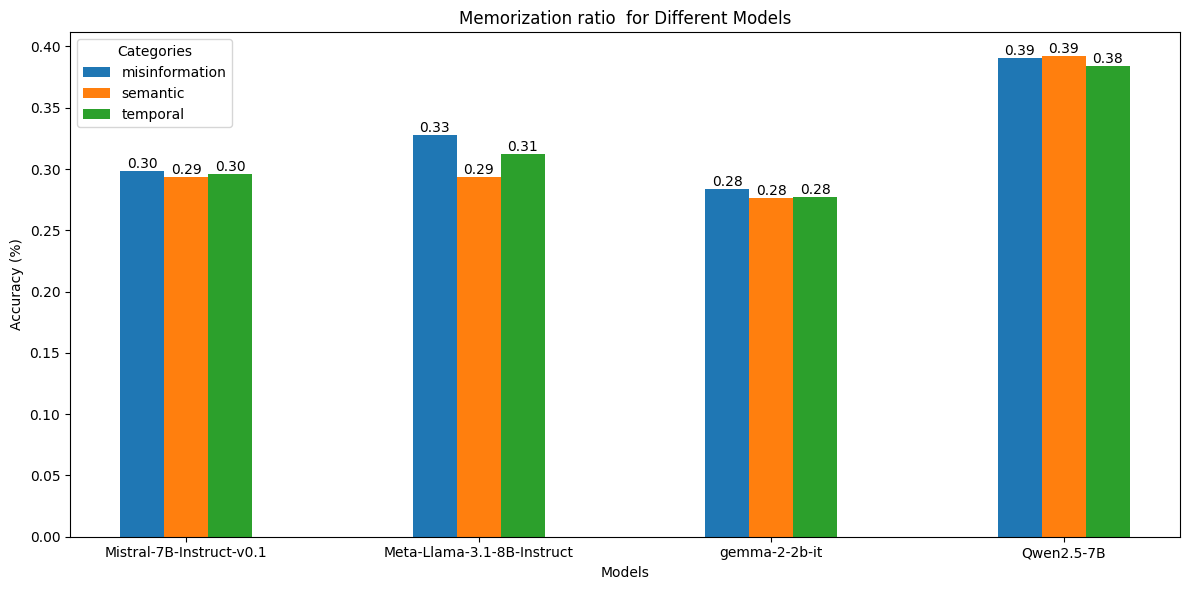

In [30]:
# 获取所有可能的 categories
all_categories = set()
for model_name, data in results.items():
    all_categories.update(data.keys())

all_categories = sorted(all_categories)

# 生成一个包含所有模型和分类的分组条形图
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15  # 每个条形图的宽度
index = range(len(results))  # X轴的位置
# 绘制不同分类的条形图
for idx, category in enumerate(all_categories):
    Mr = [acc_set[model_name]/(acc_set[model_name]+ results[model_name].get(category, 0)) for model_name in results]
    bar_pos = [i + bar_width * idx for i in index]  # 计算每个分类在每个模型上的偏移量
    # ax.bar(bar_pos, accuracies, bar_width, label=category)
    bars = ax.bar(bar_pos, Mr, bar_width, label=category)

# 在每个条形上显示具体数值
    for bar in bars:
        yval = bar.get_height()  # 获取条形的高度
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x 轴位置
            yval,  # y 轴位置（即条形的高度）
            f'{yval:.2f}',  # 显示的文字（保留2位小数）
            ha='center', va='bottom'  # 设置文字对齐方式
        )
# 添加标题和标签
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Memorization ratio  for Different Models')
ax.set_xticks([i + bar_width for i in index])  # 调整X轴的位置
ax.set_xticklabels(results.keys())  # 设置X轴标签为模型名称

# 添加图例
ax.legend(title='Categories')

# 显示图表
plt.tight_layout()
plt.show()